<center><h1>Logistic Regression</h1></center>

## 1. Classification.

**Linear regression** is a supervised machine learning technique that works well when the target column we're trying to predict, the dependent variable, is ordered and continuous. If the target column instead contains discrete values, then linear regression isn't appropriate.

In this lesson, we'll explore how to build a predictive model for these types of problems, which are known as **classification** problems. In classification, our target column has a limited set of possible values which represent different categories for a row. We use integers to represent the different categories to continue use of mathematical functions for describing how the independent variables map to the dependent variable. Here are a few examples of classification problems:

| Problem                                                                   | Sample Features                                    | Type        | Categories           | Numerical Categories |
|---------------------------------------------------------------------------|----------------------------------------------------|-------------|----------------------|----------------------|
| Should we accept this student based on their graduate school application? | College GPA, SAT Score, Quality of Recommendations | Binary      | Don't Accept, Accept | 0, 1                 |
| What is the most likely blood type of 2 parent's offspring?               | Parent 1's blood type, Parent 2's blood type.      | Multi-class | A, B, AB, O          | 1, 2, 3, 4           |

We'll focus on **binary classification** for now, where the only two options for values are:

- `0` for the False condition,
- `1` for the True condition.

Before we learn more classification, let's gain an understand of the data.

## 2. Introduction to the Data.

Every year high school students and college students apply to various universities and programs. Each student has a unique set of test scores, grades, and backgrounds. Somehow, admission committees decide which applicants to accept or reject from their program. In this case a binary classification algorithm can be used to accept or reject applicants. To understand the concepts of classification, we'll try to predict whether an applicant will be admitted to a U.S. graduate program.

We'll be working with a dataset containing data from 644 applicants with the following columns:

- `gre` - Applicant's Graduate Record Exam score. The GRE is a generalized test for prospective graduate students.
    - Score ranges from 200 to 800.
- `gpa` - College grade point average.
    - Continuous between 0.0 and 4.0.
- `admit` - Binary value
    - Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected.

Here's a preview of the dataset:

| admit 	| gpa      	| gre        	|
|-------	|----------	|------------	|
| 0     	| 3.177277 	| 594.102992 	|
| 0     	| 3.412655 	| 631.528607 	|
| 0     	| 2.728097 	| 553.714399 	|
| 0     	| 3.093559 	| 551.089985 	|
| 0     	| 3.141923 	| 537.184894 	|

While we can use both the gpa and gre columns to predict the admit column, we'll focus on using just the gpa column to keep things simple. Let's read the data into Pandas and visualize the relationship between gpa and admit.

### Exercise

- Read `admissions.csv` into a Dataframe named `admissions`.
- Use the Matplotlib method [scatter](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html) to generate a scatter plot with the:
    - `gpa` column on the x-axis.
    - `admit` column on the y-axis.
- Use `plt.show()` to display the scatter plot.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

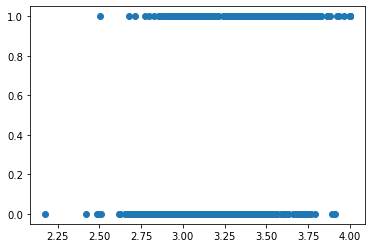

In [2]:
admissions = pd.read_csv('admissions.csv')

plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

## 3. Logistic Regression.

In the previous scatter plot, you'll notice that the `gpa` column and the `admit` column do not have a clear linear relationship. The `admit` column only contains the values `0` and `1`. The values are used to represent binary values and the numbers themselves don't carry any weight. When numbers are used to represent different options or categories, they are referred to as **categorical values**. Classification focuses on estimating the relationship between the independent variables and the dependent, **categorical variable**.

In this lesson, we'll focus on a classification technique called **logistic regression**. While a linear regression model outputs a real number as the label, a logistic regression model outputs a probability value. In binary classification, if the probability value is larger than a certain threshold probability, we assign the label for that row to `1` or `0`.

This threshold probability is something we select. We'll learn about how to select a good threshold probability in later lessons. For now, let's learn more about how logistic regression works.

## 4. Logistic Function.

In linear regression, we used the linear function `y = mx + b` to represent the relationship between the independent variables and the dependent variable. In logistic regression, we use the **logistic function**, which is a version of the linear function that is adjusted for classification.

Let's explore some of the logistic function's properties to better understand why it's useful for classification tasks. Unlike in linear regression, where the output can be any real value, in logistic regression the output has to be a real value between `0` and `1`, since the output represents a probability value. Note that the model can't output a negative value, because it would violate this criteria.

Here's the mathematical representation of the logistic function:

$\sigma(t)=\dfrac{e^t}{1+e^t}$

The logistic function is broken up into two key parts:  
- The exponential transformation, transforming all values to be positive: $e^t$ 
- The normalization transformation, transforming all values to range between `0` and `1`: $\displaystyle\frac{t}{1 + t}$

The exponential transformation and the normalization force the output values to be squeezed between `0` and `1`. If you plot just the exponential part, the output values won't be limited to the range of `0` to `1`:

<img src="figs/4esqrpy.png" height="400" width="600" alt=""/>

Normalization alone isn't sufficient since it struggles at constraining negative values:

<img src="figs/qbpTcrr.png" height="400" width="600" alt=""/>

Together, both of these pieces work well to constrain the output to the range of values that probabilities are in. In the following code cell, we plot the logistic function to visualize its properties. Specifically, we perform the following tasks:

- define the `logistic()` function using the [NumPy `exp` function](https://numpy.org/doc/stable/reference/generated/numpy.exp.html),
- generate equally spaced values, between `-6` and `6` to represent the x-axis,
- calculate the y-axis values by feeding each value in <code>x</code> to the <code>logistic()</code> function,
- create a line plot to visualize `x` and `y`.

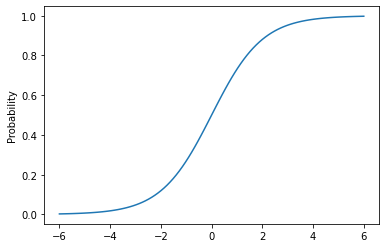

In [3]:
def logistic(t):
    return np.exp(t) / (1 + np.exp(t))

x = np.linspace(-6, 6, 100, dtype='float')
y = logistic(x)

plt.plot(x, y)
plt.ylabel('Probability')
plt.show()

The generated plot demonstrates that the y-axis values are constrained to range from `0` to `1`. We encourage you to plot more x-values to confirm that this holds true for all potential `x` values.

## 5. Training a Logistic Regression Model.
Let's now move onto training the logistic regression model using our dataset.  In this lesson, we won't learn about the math and the steps required to fit a logistic regression model to the training data.  Instead, we will focus on using the scikit-learn library to fit a model between the `gpa` and `admit` columns. The `gpa` column contains the GPA of each applicant as a real value between `0.0` and `4.0` and the `admit` column specifies if that applicant was admitted (`0` if not admitted and `1` if admitted).  Since we're only working with one feature, `gpa`, this is referred to as a univariate model.     

Training a logistic regression model in scikit-learn is similar to training a linear regression model, with the key difference that we use the **LogisticRegression** class instead of the **LinearRegression** class.  Scikit-learn was designed to make it easy to swap out models by keeping the syntax and notation as consistent as possible across its different classes
    
### Exercise


- Import the <strong>LogisticRegression</strong> class and instantiate a model named <code>logistic_model</code>.
- Use the <strong>LogisticRegression</strong> method <code>fit</code> to fit the model to the data.  We're only interested in constructing a model that uses <code>gpa</code> values to predict <code>admit</code> values. 
- View the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html " target="_blank">documentation for the LogisticRegression class</a> if you get stuck.

In [4]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[['gpa']], admissions['admit'])

LogisticRegression()

## 6. Plotting Probabilities.
We mentioned earlier that the output of a logistic regression model is the probability that the row should be labelled as <strong>True</strong>, or in our case <strong>1</strong>.  We can use the trained model to return the predicted probability for each row in the training data.
To return the predicted probability, use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">the <code>predict_proba</code> method</a>.  The only required parameter for this method is the <code>num_features</code> by <code>num_sample</code> matrix of observations we want scikit-learn to return predicted probabilities for.  For each input row, scikit-learn returns a NumPy array with two probability values:
Since <code>0</code> and <code>1</code> are the only two possible categories and represent the entire outcome space, these two probabilities add up to <code>1</code>.  

```ipython
probabilities = logistic_model.predict_proba(admissions[["gpa"]])
# Probability that the row belongs to label `0`.
probabilities[:,0]
# Probabililty that the row belongs to label `1`.
probabilities[:,1]
```

Let's use this method to return the probability for admission for each student and then visualize the results on a scatter plot.
### Exercise
<p>Use the LogisticRegression method <code>predict_proba</code> to return the predicted probabilities for the data in the <code>gpa</code> column.  Assign the returned probabilities to <code>pred_probs</code>.</p>

<p>Create and display a scatter plot using the <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter" target="_blank">Matplotlib <code>scatter</code> function</a> where:</p><ul><li>the x-axis is the values in the <code>gpa</code> column,</li><li>the y-axis is the probability of being classified as label <code>1</code>.</li></ul>

In [5]:
pred_probs = logistic_model.predict_proba(admissions[['gpa']])
print(pred_probs)

[[0.66343633 0.33656367]
 [0.53967962 0.46032038]
 [0.84160275 0.15839725]
 ...
 [0.69368514 0.30631486]
 [0.46457162 0.53542838]
 [0.47350995 0.52649005]]


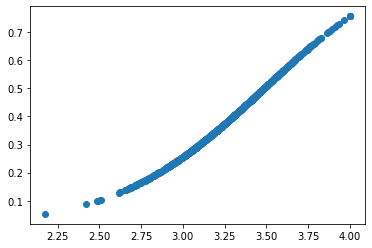

In [6]:
plt.scatter(admissions['gpa'], pred_probs[:,1])
plt.show()

## 7. Predict Labels.

You'll notice that the scatter plot suggests a linear relationship between the `gpa` values and the probability of being admitted.  This is because logistic regression is really just an adapted version of linear regression for classification problems.  Both logistic and linear regression are used to capture linear relationships between the independent variables and the dependent variable.

Let's use the `predict` method to return the label predictions for each row in our training dataset.
### Exercise
 
- Use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">LogisticRegression method `predict`</a> to return the predicted for each label in the training set.
    - The parameter for the `predict` method matches that of the `predict_proba` method:
        - `X`: rows of data to use for prediction.
    - Assign the result to `fitted_labels`.

- Create and display a scatter plot using the <a href="https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html" target="_blank">Matplotlib `scatter` function</a> where:
    - the x-axis is the values in the `gpa` column,
    - the y-axis is `fitted_labels`

[0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 

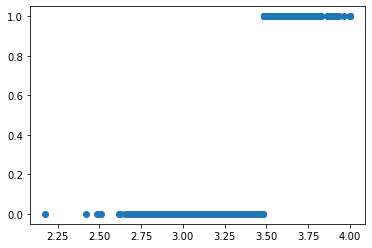

In [7]:
fitted_labels = logistic_model.predict(admissions[['gpa']])
print(fitted_labels)

plt.scatter(admissions['gpa'], fitted_labels)
plt.show()

## 8. Next Steps.
In this lesson, we learned the basics of classification and how to use a specific classification technique called **logistic regression**. In the next lesson, we'll learn how to evaluate the effectiveness of a classification model.